In [57]:
import importlib
import itertools
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

np.random.seed(33333)
torch.manual_seed(33333)
%matplotlib inline

import analysis
import razor_data
import toy_data
import plotting
import gp
importlib.reload(analysis);
importlib.reload(razor_data);
importlib.reload(toy_data);
importlib.reload(plotting);

In [59]:
def run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell=200, k_alpha=200, 
                      steps=10000, lr=0.01, num_layers=1,
                      verbose=False, print_every=100, clip=0.1,
                      scale=1.0,):
    kernel = gp.SquaredExponentialKernel(k_ell, k_alpha, fixed=True)
    data = analysis.get_data(box, btags, num_mr_bins, mr_max, scale=scale)
    U = data['u']
    Y = data['y']
    G = gp.DeepVariationalPoissonGP(kernel, U, Y, num_layers)
    G.fit(num_steps=steps, lr=lr, clip=clip,
          verbose=verbose, print_every=print_every)
    return G

# make this plot the predictions at each layer
def plot_deep_GP(G, box, btags, num_mr_bins, mr_max, ymin=0.1,
                num_samples=10000, scale=1.0):
    num_layers = G.num_layers
    data = analysis.get_data(box, btags, num_mr_bins, mr_max, scale=scale)
    for i_layer in range(num_layers-1):
        title = 'Prediction at layer {}'.format(i_layer)
        Z = G.layers[i_layer].get_Z().data
        samples = G.sample(G.U.data, 
                num_samples=int(num_samples/10),
                at_layer=i_layer)
        plotting.plot_hist_1d(U=G.U.data, samples=samples, Z=Z,
                             title=title, log=False,
                             adjust_range=False, 
                             x_scale=1/scale, y_scale=1/scale)
    # do last layer with data and nsigma plot
    samples = np.exp(G.sample(data['u'], num_samples=num_samples))
    plotting.plot_hist_1d(U=G.U.data, Y=G.Y.data, samples=samples,
                     Z=G.layers[-1].get_Z().data, ymin=ymin,
                         title='Prediction at output layer',
                         x_scale=1/scale)

In [60]:
box = 'SevenJet'
btags = 2
num_mr_bins = 50
mr_max = 4000
k_ell = 1
k_alpha = 100
steps = 1000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001 # scaling the MR values makes the computation more stable

G_sj2b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 24437.770
Iteration 100: -ELBO = -1417.388
Iteration 200: -ELBO = -1627.144
Iteration 300: -ELBO = -1724.833
Iteration 400: -ELBO = -1749.666
Iteration 500: -ELBO = -1744.526
Iteration 600: -ELBO = -1754.977
Iteration 700: -ELBO = -1741.456
Iteration 800: -ELBO = -1756.127
Iteration 900: -ELBO = -1761.594
Final loss = -1755.588


In [61]:
G_sj2b.fit(2000)

Iteration 0: -ELBO = -1754.951
Iteration 100: -ELBO = -1747.227
Iteration 200: -ELBO = -1737.791
Iteration 300: -ELBO = -1760.049
Iteration 400: -ELBO = -1745.695
Iteration 500: -ELBO = -1753.355
Iteration 600: -ELBO = -1745.159
Iteration 700: -ELBO = -1760.433
Iteration 800: -ELBO = -1754.510
Iteration 900: -ELBO = -1756.525
Iteration 1000: -ELBO = -1761.477
Iteration 1100: -ELBO = -1756.426
Iteration 1200: -ELBO = -1752.213
Iteration 1300: -ELBO = -1757.776
Iteration 1400: -ELBO = -1761.573
Iteration 1500: -ELBO = -1762.704
Iteration 1600: -ELBO = -1762.459
Iteration 1700: -ELBO = -1759.505
Iteration 1800: -ELBO = -1739.224
Iteration 1900: -ELBO = -1759.888
Final loss = -1754.204


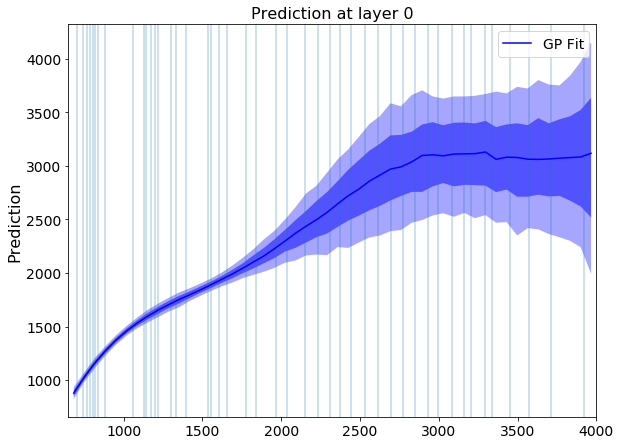

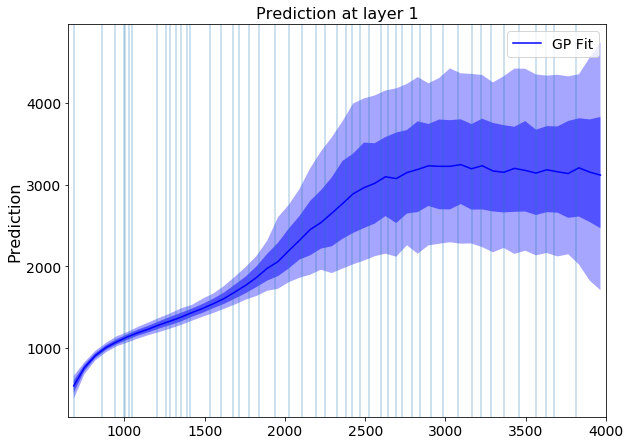

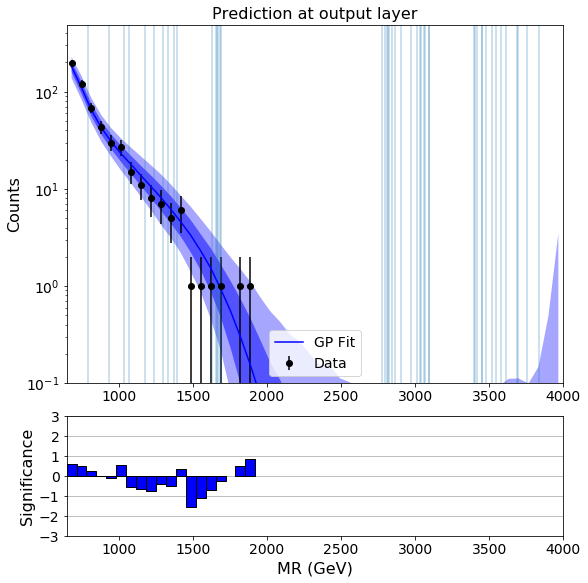

In [62]:
plot_deep_GP(G_sj2b, box, btags, num_mr_bins, mr_max, 
             scale=scale, num_samples=10000)

In [63]:
box = 'MultiJet'
btags = 1
num_mr_bins = 50
mr_max = 1800
k_ell = 1
k_alpha = 150
steps = 2000
lr = 0.01
verbose = True
print_every = 100
num_layers = 2
clip = 0.1
scale = 0.001

G_mj1b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      clip=clip, scale=scale)

Iteration 0: -ELBO = 3156.658
Iteration 100: -ELBO = -16760.133
Iteration 200: -ELBO = -16902.402
Iteration 300: -ELBO = -16960.871
Iteration 400: -ELBO = -16987.455
Iteration 500: -ELBO = -16991.096
Iteration 600: -ELBO = -16998.975
Iteration 700: -ELBO = -16987.832
Iteration 800: -ELBO = -16973.365
Iteration 900: -ELBO = -16985.367
Iteration 1000: -ELBO = -17006.729
Iteration 1100: -ELBO = -17004.889
Iteration 1200: -ELBO = -16993.986
Iteration 1300: -ELBO = -16988.092
Iteration 1400: -ELBO = -16982.186
Iteration 1500: -ELBO = -16998.473
Iteration 1600: -ELBO = -17002.809
Iteration 1700: -ELBO = -17003.447
Iteration 1800: -ELBO = -17000.066
Iteration 1900: -ELBO = -16981.408
Final loss = -16994.117


In [64]:
G_mj1b.fit(1000)

Iteration 0: -ELBO = -17002.328
Iteration 100: -ELBO = -16986.574
Iteration 200: -ELBO = -16999.863
Iteration 300: -ELBO = -16986.111
Iteration 400: -ELBO = -16990.588
Iteration 500: -ELBO = -17008.371
Iteration 600: -ELBO = -16999.439
Iteration 700: -ELBO = -16997.344
Iteration 800: -ELBO = -17001.850
Iteration 900: -ELBO = -16994.613
Final loss = -17005.508


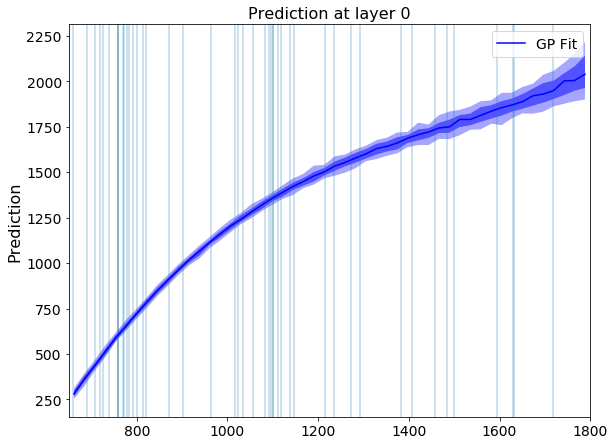

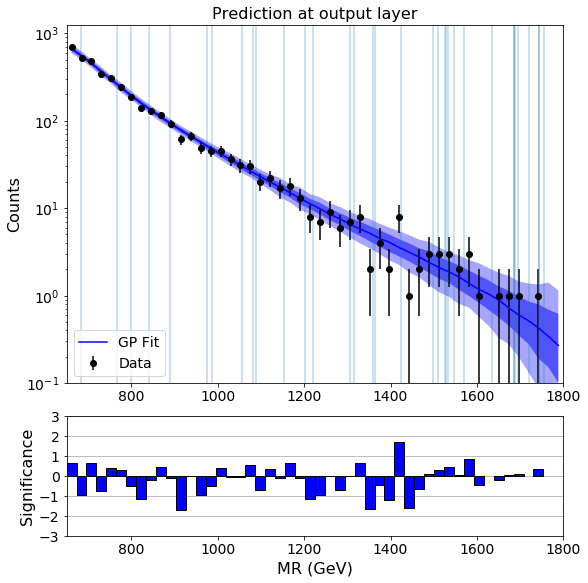

In [65]:
plot_deep_GP(G_mj1b, box, btags, num_mr_bins, mr_max, num_samples=1000,
            scale=scale)

In [66]:
box = 'MultiJet'
btags = 1
num_mr_bins = 50
mr_max = 1800
k_ell = 1
k_alpha = 150
steps = 2000
lr = 0.01
verbose = True
print_every = 100
num_layers = 5
clip = 0.1
scale = 0.001

G_mj1b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      clip=clip, scale=scale)

Iteration 0: -ELBO = 3952.859
Iteration 100: -ELBO = -16313.897
Iteration 200: -ELBO = -16640.531
Iteration 300: -ELBO = -16742.777
Iteration 400: -ELBO = -16867.531
Iteration 500: -ELBO = -16859.438
Iteration 600: -ELBO = -16896.131
Iteration 700: -ELBO = -16880.203
Iteration 800: -ELBO = -16873.340
Iteration 900: -ELBO = -16857.094
Iteration 1000: -ELBO = -16873.701
Iteration 1100: -ELBO = -16887.359
Iteration 1200: -ELBO = -16840.418
Iteration 1300: -ELBO = -16874.010
Iteration 1400: -ELBO = -16881.488
Iteration 1500: -ELBO = -16787.881
Iteration 1600: -ELBO = -16855.982
Iteration 1700: -ELBO = -16814.625
Iteration 1800: -ELBO = -16874.088
Iteration 1900: -ELBO = -16853.031
Final loss = -16862.158


In [67]:
G_mj1b.fit(1000)

Iteration 0: -ELBO = -16884.699
Iteration 100: -ELBO = -16847.016
Iteration 200: -ELBO = -16900.924
Iteration 300: -ELBO = -16893.746
Iteration 400: -ELBO = -16890.045
Iteration 500: -ELBO = -16857.385
Iteration 600: -ELBO = -16872.100
Iteration 700: -ELBO = -16879.072
Iteration 800: -ELBO = -16876.283
Iteration 900: -ELBO = -16886.402
Final loss = -16892.445


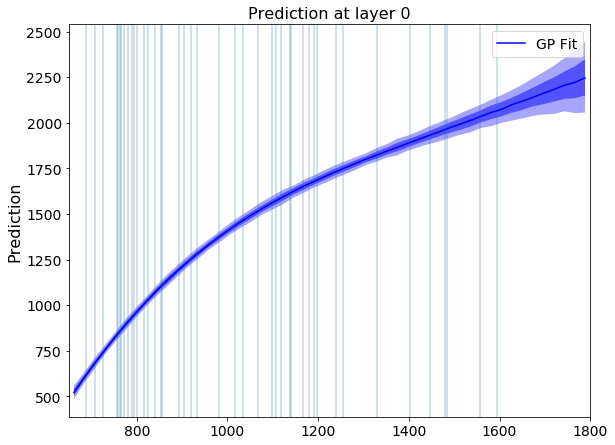

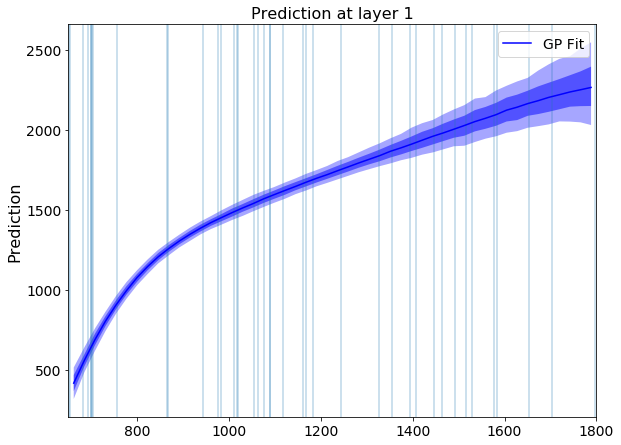

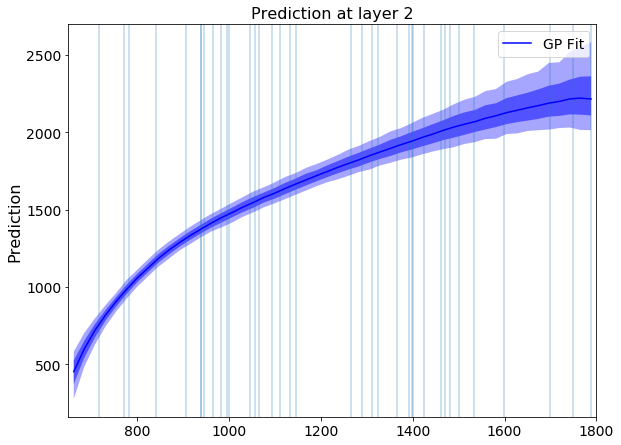

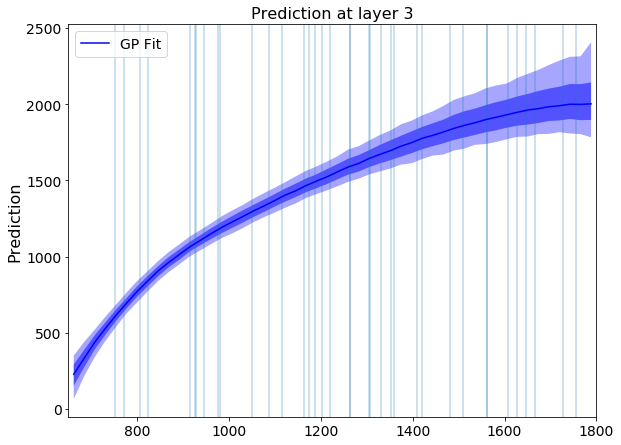

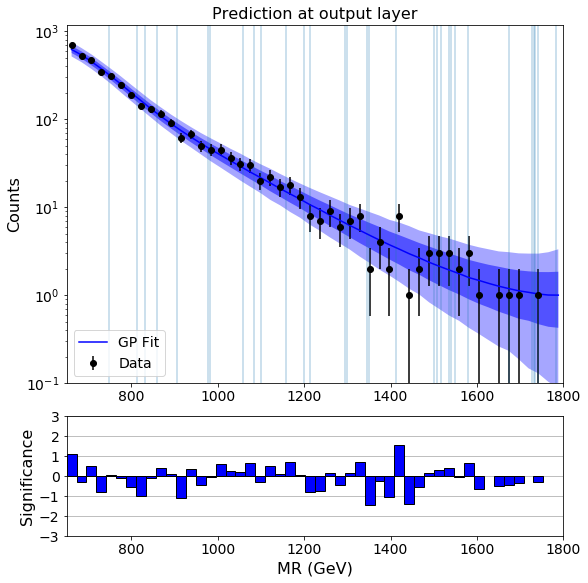

In [68]:
plot_deep_GP(G_mj1b, box, btags, num_mr_bins, mr_max, num_samples=20000,
            scale=scale)

In [69]:
box = 'LeptonSevenJet'
btags = 1
num_mr_bins = 50
mr_max = 4000
k_ell = 1
k_alpha = 100
steps = 1000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001

G_lsj2b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 99119.555
Iteration 100: -ELBO = 351.991
Iteration 200: -ELBO = 99.406
Iteration 300: -ELBO = 26.872
Iteration 400: -ELBO = 13.028
Iteration 500: -ELBO = 11.435
Iteration 600: -ELBO = 15.268
Iteration 700: -ELBO = 5.916
Iteration 800: -ELBO = 77.817
Iteration 900: -ELBO = 7.054
Final loss = 6.636


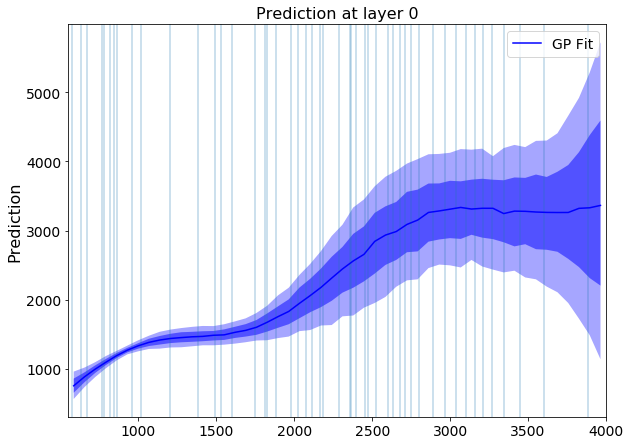

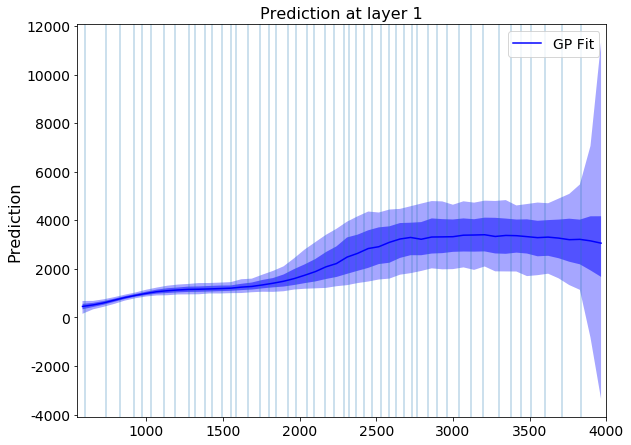

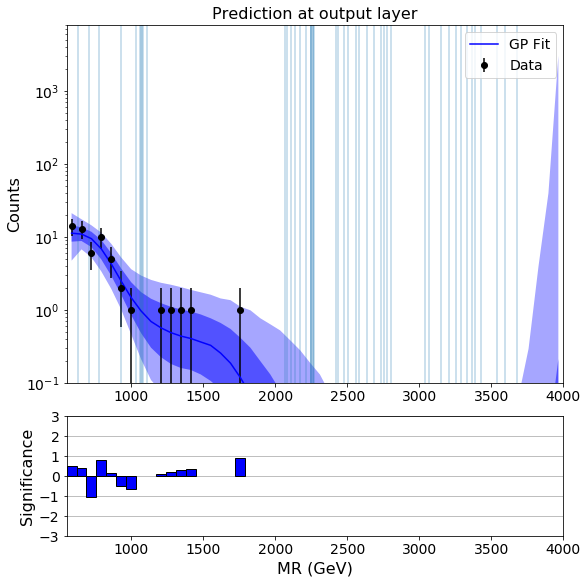

In [70]:
plot_deep_GP(G_lsj2b, box, btags, num_mr_bins, mr_max, num_samples=10000,
            scale=scale)

In [71]:
box = 'DiJet'
btags = 0
num_mr_bins = 50
mr_max = 2000
k_ell = 1
k_alpha = 100
steps = 1000
lr = 0.01
verbose = True
print_every = 100
num_layers = 3
scale = 0.001

G_dj0b = run_deep_gp(box, btags, num_mr_bins, mr_max, 
                      k_ell, k_alpha, steps, lr, num_layers,
                      verbose=verbose, print_every=print_every, 
                      scale=scale)

Iteration 0: -ELBO = 105205.953
Iteration 100: -ELBO = -957.535
Iteration 200: -ELBO = -1150.185
Iteration 300: -ELBO = -1242.634
Iteration 400: -ELBO = -1256.590
Iteration 500: -ELBO = -1251.635
Iteration 600: -ELBO = -1260.480
Iteration 700: -ELBO = -1254.611
Iteration 800: -ELBO = -1258.483
Iteration 900: -ELBO = -1262.447
Final loss = -1264.053


In [72]:
G_dj0b.fit(10000)

Iteration 0: -ELBO = -1259.730
Iteration 100: -ELBO = -1266.877
Iteration 200: -ELBO = -1256.141
Iteration 300: -ELBO = -1248.560
Iteration 400: -ELBO = -1260.107
Iteration 500: -ELBO = -1253.381
Iteration 600: -ELBO = -1260.884
Iteration 700: -ELBO = -1257.157
Iteration 800: -ELBO = -1261.895
Iteration 900: -ELBO = -1261.476
Iteration 1000: -ELBO = -1258.485
Iteration 1100: -ELBO = -1258.826
Iteration 1200: -ELBO = -1260.060
Iteration 1300: -ELBO = -1255.836
Iteration 1400: -ELBO = -1018.127
Iteration 1500: -ELBO = -1254.053
Iteration 1600: -ELBO = -1262.235
Iteration 1700: -ELBO = -1246.900
Iteration 1800: -ELBO = -1256.965
Iteration 1900: -ELBO = -1258.565
Iteration 2000: -ELBO = -1258.651
Iteration 2100: -ELBO = -1260.970
Iteration 2200: -ELBO = -1256.147
Iteration 2300: -ELBO = -1254.435
Iteration 2400: -ELBO = -1262.778
Iteration 2500: -ELBO = -1258.058
Iteration 2600: -ELBO = -1263.922
Iteration 2700: -ELBO = -1259.907
Iteration 2800: -ELBO = -1261.919
Iteration 2900: -ELBO = -1

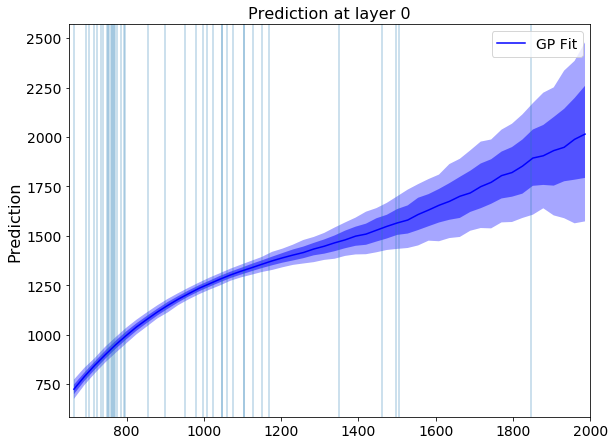

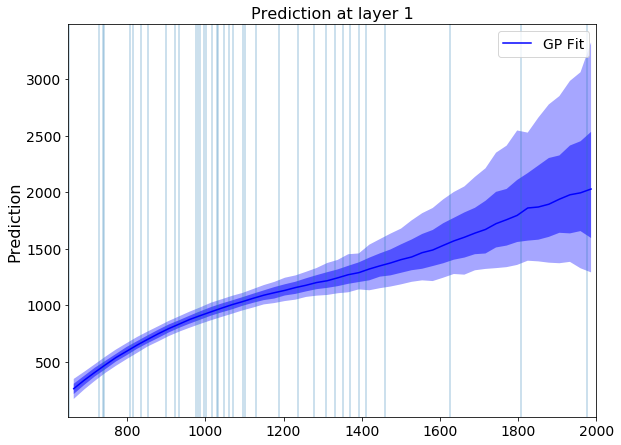

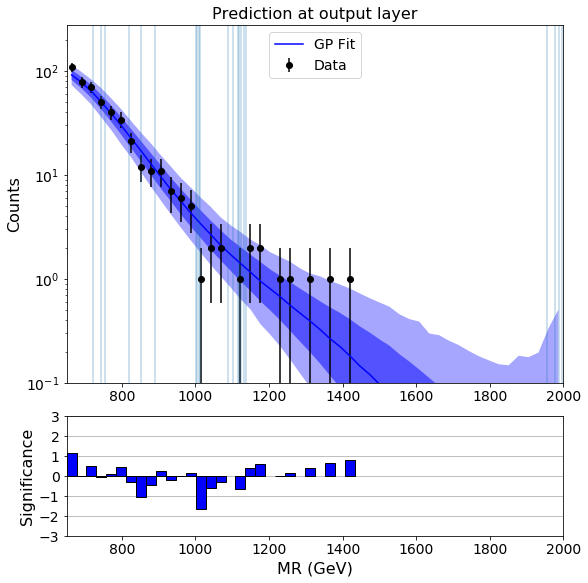

In [73]:
plot_deep_GP(G_dj0b, box, btags, num_mr_bins, mr_max, num_samples=10000,
            scale=scale)